# 13-02 센텐스피스(SentencePiece)

BPE를 포함하여 기타 서브워드 토크나이징 알고리즘들을 내장한 센텐스피스(SentencePiece)는 일반적으로 실무에서 선택할 수 있는 최선의 선택 중 하나입니다.

## 센텐스피스(SentencePiece)

내부 단어 분리를 위한 유용한 패키지로 구글의 센텐스피스(Sentencepiece)가 있습니다. 센텐스피스는 사전 토큰화 작업없이 단어 분리 토큰화를 수행하므로 언어에 종속되지 않습니다.

In [1]:
pip install sentencepiece


     ---------------------------------------- 1.1/1.1 MB 5.5 MB/s eta 0:00:00


## IMDB 리뷰 토큰화하기

In [2]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

train_df = pd.read_csv('IMDb_Reviews.csv')
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [3]:
print('리뷰 개수 :',len(train_df)) # 리뷰 개수 출력

리뷰 개수 : 50000


In [4]:
# 센텐스피스의 입력으로 사용하기 위해서 데이터프레임을 txt 파일로 저장
with open('imdb_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(train_df['review']))

In [5]:
# 센텐스피스로 단어 집합과 각 단어에 고유한 정수를 부여
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

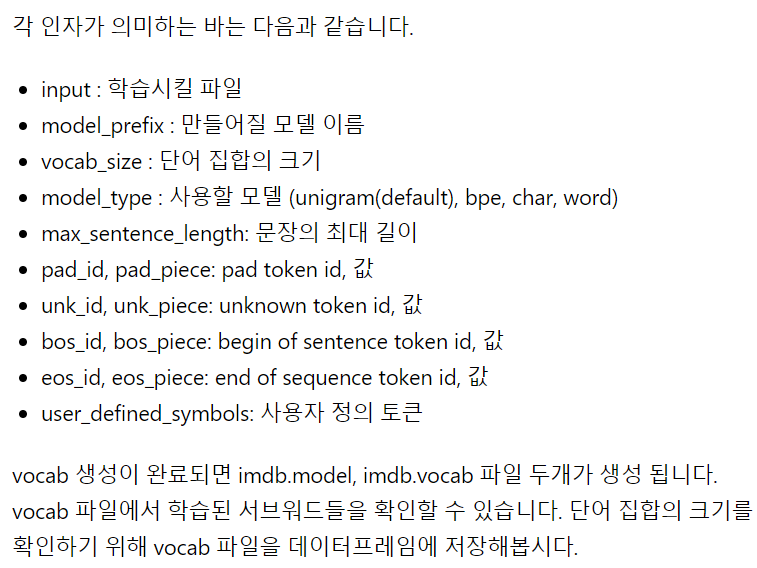

In [6]:
vocab_list = pd.read_csv('imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
729,▁pretty,-726
4008,▁gri,-4005
3273,▁basic,-3270
502,ved,-499
1291,uth,-1288
794,ash,-791
1782,ering,-1779
1219,▁cop,-1216
3295,▁pun,-3292
2857,ites,-2854


In [7]:
# vocab_size의 인자를 통해 단어 집합의 크기를 5,000개로 제한하였으므로 단어 집합의 크기는 5,000개
len(vocab_list)

5000

In [8]:
# model 파일을 로드하여 단어 시퀀스를 정수 시퀀스로 바꾸는 인코딩 작업이나 반대로 변환하는 디코딩 작업 가능
sp = spm.SentencePieceProcessor()
vocab_file = "imdb.model"
sp.load(vocab_file)

True

In [9]:
lines = [
  "I didn't at all think of it this way.",
  "I have waited a long time for someone to film"
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line)) # 문장을 입력하면 서브 워드 시퀀스로 변환
  print(sp.encode_as_ids(line)) # 문장을 입력하면 정수 시퀀스로 변환
  print()

I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 623, 4950, 4926, 138, 169, 378, 30, 58, 73, 413, 4945]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]



In [10]:
sp.GetPieceSize() # 단어 집합의 크기를 확인

5000

In [11]:
sp.IdToPiece(430) # 정수로부터 맵핑되는 서브 워드로 변환

'▁character'

In [12]:
sp.PieceToId('▁character') # 서브워드로부터 맵핑되는 정수로 변환

430

In [13]:
sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]) # 정수 시퀀스로부터 문장으로 변환

'I have waited a long time for someone to film'

In [14]:
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']) # 서브워드 시퀀스로부터 문장으로 변환

'I have waited a long time for someone to film'

In [15]:
print(sp.encode('I have waited a long time for someone to film', out_type=str)) # 문장으로부터 서브워드 시퀀스로 변환
print(sp.encode('I have waited a long time for someone to film', out_type=int)) # 문장으로부터 정수 시퀀스로 변환

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]


## 네이버 영화 리뷰 토큰화하기

In [16]:
import pandas as pd
import sentencepiece as spm
import urllib.request
import csv

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

naver_df = pd.read_table('ratings.txt')
naver_df[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [17]:
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

리뷰 개수 : 200000


In [22]:
# naver_review.txt 파일에 저장
with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

In [23]:
# 센텐스피스를 통해 단어 집합을 생성
spm.SentencePieceTrainer.Train('--input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

RuntimeError: Internal: D:\a\sentencepiece\sentencepiece\src\trainer_interface.cc(660) [(trainer_spec_.vocab_size()) == (model_proto->pieces_size())] Vocabulary size too high (5000). Please set it to a value <= 624.

In [ ]:
# subwords 확인
vocab_list = pd.read_csv('naver.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

In [ ]:
# Vocabulary 에는 unknown, 문장의 시작, 문장의 끝을 의미하는 special token이 0, 1, 2에 사용
vocab_list.sample(10)

In [ ]:
len(vocab_list)

In [ ]:
sp = spm.SentencePieceProcessor()
vocab_file = "naver.model"
sp.load(vocab_file)

In [ ]:
lines = [
  "뭐 이딴 것도 영화냐.",
  "진짜 최고의 영화입니다 ㅋㅋ",
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line))
  print(sp.encode_as_ids(line))
  print()